In [4]:
from bs4 import BeautifulSoup as bs
import requests 
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [5]:
#scraping the data
URL = "https://www.worldometers.info/coronavirus"
r = requests.get(URL) 
soup = bs(r.content, 'html5lib') 
main = soup.findAll('div', attrs = {'class':'maincounter-number'}) 
t=main[0].text.strip().replace(',',"")
d=main[1].text.strip().replace(',',"")
r=main[2].text.strip().replace(',',"")
t=int(t)
d=int(d)
r=int(r)
da = datetime.datetime.now()

print(da.date())

2020-03-08


In [10]:
# For first run
total=[]
deaths=[]
recovered=[]
date=[]
date1=[]

# use tem.csv to update original data
try:
    df1=pd.read_csv("temp3.csv")
except:
    data={"Total Cases":total,"Deaths":deaths,"Recovered":recovered,"Date":date}
    df1=pd.DataFrame(data)
    df1.to_csv("temp3.csv",index=False)
#print(df1)
total.append(t)
deaths.append(d)
recovered.append(r)
date.append(da)
date1.append(da.date())
data={"Total Cases":total,"Deaths":deaths,"Recovered":recovered,"Date":date,"Date1":date1}
df=pd.DataFrame(data)

df=df.append(df1)
#print(df1)
print(df)
df.to_csv("temp3.csv",index=False)



                         Date       Date1  Deaths  Recovered  Total Cases
0  2020-03-08 21:05:34.749519  2020-03-08  3662.0    60924.0     107828.0
0                  2020-03-08         NaN  3652.0    60910.0     107420.0
1                  2020-03-08         NaN  3652.0    60910.0     107420.0
2                  2020-03-08         NaN  3652.0    60910.0     107420.0
3                  2020-03-08         NaN  3652.0    60910.0     107420.0
4                  2020-03-08         NaN  3652.0    60910.0     107420.0
5                  2020-03-08         NaN  3652.0    60910.0     107420.0
6                  2020-03-08         NaN  3652.0    60910.0     107420.0
7                  2020-03-08         NaN  3652.0    60910.0     107420.0
8                  2020-03-08         NaN  3652.0    60910.0     107420.0
9                  2020-03-08         NaN  3652.0    60910.0     107420.0


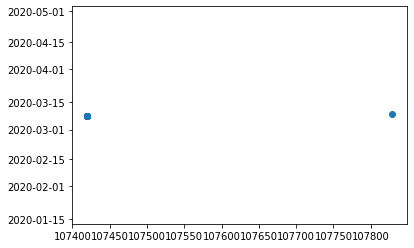

In [23]:
x1=df.loc[:,'Total Cases']
y1=df.loc[:,'Date']

plt.scatter(x1,y1)
plt.show()
plt.show()

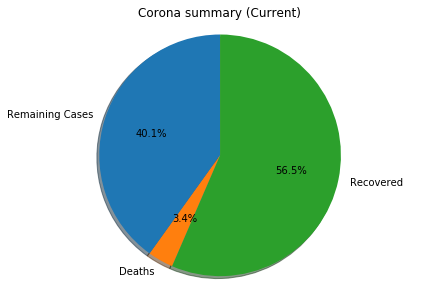

In [22]:
labels = ['Remaining Cases', 'Deaths', 'Recovered']
sizes = [t-d-r,d,r]
explode = (0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Corona summary (Current)")

plt.show()